Determine the Thalweg in more Detail and Channelize it

In [1]:
from __future__ import division
import matplotlib.pylab as plt
import netCDF4 as nc
import numpy as np
from salishsea_tools import bathy_tools
%matplotlib inline

In [2]:
def plot_bathy_grid_mesh(bathy, depths, title, cmap='winter_r'):
    '''plot the bathymetry'''
    plt.figure(figsize=(7, 7))
    bathy_tools.set_aspect_ratio(bathy.variables['nav_lat'])
    plt.pcolormesh(depths[:], cmap=cmap)
    plt.colorbar()
    plt.title(title)

In [3]:
nc_filepath = '../../NEMO-forcing/grid/bathy_meter_SalishSea2.nc'
bathy = nc.Dataset(nc_filepath, 'r')
depths = bathy.variables['Bathymetry']
nc_old_filepath = '../../NEMO-forcing/grid/bathy_meter_SalishSea.nc'
old_bathy = nc.Dataset(nc_old_filepath, 'r')
old_depths = old_bathy.variables['Bathymetry']

In [4]:
lats = bathy.variables['nav_lat'][:]
lons = bathy.variables['nav_lon'][:]

/home/sallen/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:1057: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if aspect == 'normal':
/home/sallen/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:1062: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif aspect in ('equal', 'auto'):


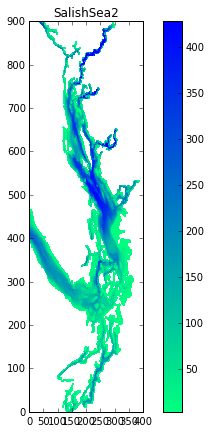

In [5]:
plot_bathy_grid_mesh(bathy, depths, 'SalishSea2')

In [6]:
diffs_lat = bathy_tools.calc_norm_depth_diffs(depths[:,11:], delta_lat=1, delta_lon=0)
lat_ij = bathy_tools.argmax(diffs_lat)
diffs_lon = bathy_tools.calc_norm_depth_diffs(depths[:,11:], delta_lat=0, delta_lon=1)
lon_ij = bathy_tools.argmax(diffs_lon)    
print diffs_lat[lat_ij], diffs_lon[lon_ij]
print depths.shape

0.8 0.876404494382
(898, 398)


In [7]:
diffs_lat = bathy_tools.calc_norm_depth_diffs(old_depths, delta_lat=1, delta_lon=0)
lat_ij = bathy_tools.argmax(diffs_lat)
diffs_lon = bathy_tools.calc_norm_depth_diffs(old_depths, delta_lat=0, delta_lon=1)
lon_ij = bathy_tools.argmax(diffs_lon)    
print diffs_lat[lat_ij], diffs_lon[lon_ij]
print depths.shape

0.8 0.8
(898, 398)


In [8]:
lines = np.loadtxt('thalweg_working.txt', delimiter=" ", unpack=False)
lines = lines.astype(int)
lines_old = np.loadtxt('../../Tools/analysis_tools/thalweg.txt', delimiter=" ", unpack=False)
lines_old = lines_old.astype(int)


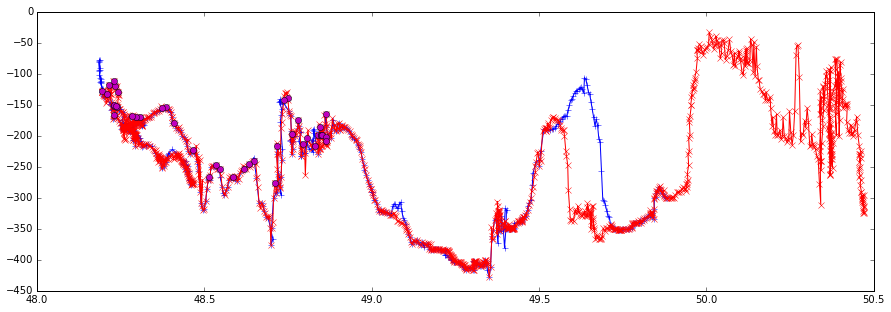

In [9]:
depthT = -depths[lines[:,0],lines[:,1]]
latsT = lats[lines[:,0],lines[:,1]]
depthO = -depths[lines_old[:,0],lines_old[:,1]]
latsO = lats[lines_old[:,0],lines_old[:,1]]


plt.figure(figsize=(15,5))
plt.plot(latsO, depthO,'+-')
plt.plot(latsT, depthT,'x-r')
#plt.xlim(48.2,48.3)
#plt.ylim(-200, -160)

peaks = ((374, 276), (368, 280), (362, 289), (362, 294), (361, 295), (361,297), (361, 303),
         (359, 307), (352, 305), (348, 301), (345, 301), (345, 293), (344, 285), (346, 274),
         (344, 272), (346, 258), (347, 253), (334, 247), (330, 246), (327, 245), (321, 241),
         (312, 238), (309, 238), (304, 238), (289, 244), (274, 245), (268, 246), (265, 246),
         (254, 234), (252, 231), (251, 228), (248, 211), (250, 202), (252, 198), (255, 195),
         (258, 191), (259, 185), (259, 183), (258, 178), (259, 164), (265, 160), (274, 153))
xi = [i[0] for i in peaks]
xj = [i[1] for i in peaks]

plt.plot(lats[xi, xj],-depths[xi, xj],'mo');


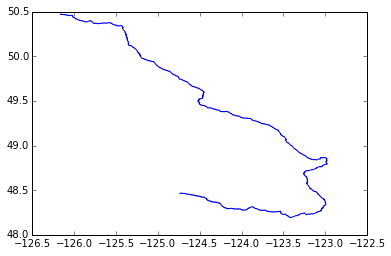

In [10]:
ls = 0
le = 1600
mylons = lons[lines[ls:le,0],lines[ls:le,1]]
mylats = lats[lines[ls:le,0],lines[ls:le,1]]
plt.plot(mylons,mylats)

<matplotlib.colorbar.Colorbar instance at 0x7fe736a2ce18>

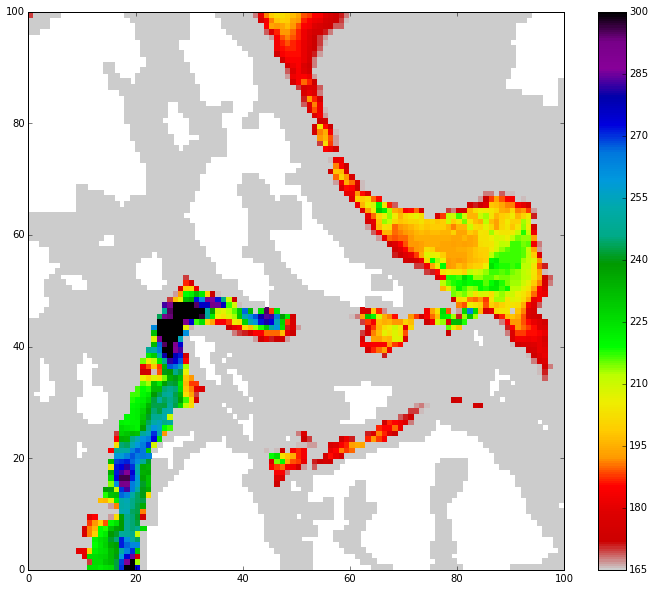

In [25]:
lines = np.loadtxt('thalweg_working.txt', delimiter=" ", unpack=False)
lines = lines.astype(int)

plt.figure(figsize=(12,10))
xs = 300; xe=400; ys= 220; ye = 320

vmax = 300
vmin = 165
so = 125
plt.pcolormesh(depths[xs:xe,ys:ye], cmap = 'spectral_r',
               vmax=vmax, vmin=vmin)
plt.plot(lines_old[ls
                   -so:le,1]-ys+0.5,lines_old[ls-so:le,0]-xs+0.5,'m-')
#plt.plot(lines[ls:le,1]-ys+0.5,lines[ls:le,0]-xs+0.5,'wo-')
#xis = [i[0]-xs+0.5 for i in peaks]
#xjs = [i[1]-ys+0.5 for i in peaks]
#plt.plot(xjs, xis, 'b*');
plt.xlim(0,ye-ys)
plt.ylim(0,xe-xs)
plt.colorbar()

#### print lines[le-2,0], lines[le-2,1], depthT[le-2] print lines[le-3,0], lines[le-3,1], depthT[le-3] print lines[le-4,0], lines[le-4,1], depthT[le-4] print depths[401,266],depths[400,267]

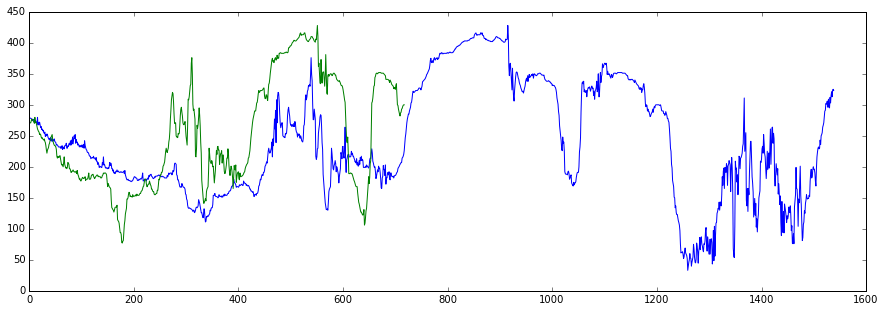

In [12]:
plt.figure(figsize=(15,5))

plt.plot(-depthT[ls:le],'-');
plt.plot(-depthO[ls:le],'-')
